In [3]:
import pandas as pd
reader=pd.read_csv("Super_Bowl.csv")
reader.head(5)

Date   SB  Attendance                    QB  Winner    Coach Winner  \
0  15-Jan-67    I       61946                    Bart Starr  Vince Lombardi   
1  14-Jan-68   II       75546                    Bart Starr  Vince Lombardi   
2  12-Jan-69  III       75389                    Joe Namath     Weeb Ewbank   
3  11-Jan-70   IV       80562   Len Dawson, Mike Livingston      Hank Stram   
4  17-Jan-71    V       79204  Earl Morrall , Johnny Unitas  Don McCafferty   

               Winner  Winning Pts                     QB Loser Coach Loser  \
0   Green Bay Packers           35                   Len Dawson  Hank Stram   
1   Green Bay Packers           33             Daryle Lamonica   John Rauch   
2       New York Jets           16  Earl Morrall, Johnny Unitas   Don Shula   
3  Kansas City Chiefs           23                     Joe Kapp   Bud Grant   
4     Baltimore Colts           16                 Craig Morton  Tom Landry   

                Loser    ...             City       State Point Difference  \
0  Kansas City Chiefs    ...      Los Angeles  California               25   
1     Oakland Raiders    ...            Miami     Florida               19   
2     Baltimore Colts    ...            Miami     Florida                9   
3   Minnesota Vikings    ...      New Orleans   Louisiana               16   
4      Dallas Cowboys    ...            Miami     Florida                3   

          Referee          Umpire  Head Linesman  Line Judge Field Judge  \
0             NaN             NaN            NaN         NaN         NaN   
1             NaN             NaN            NaN         NaN         NaN   
2             NaN             NaN            NaN         NaN         NaN   
3             NaN             NaN            NaN         NaN         NaN   
4  Norm Schachter  Paul Trepinski      Ed Marion  Jack Fette  Fritz Graf   

    Back Judge Side Judge  
0          NaN        NaN  
1          NaN        NaN  
2          NaN        NaN  
3          NaN        NaN  
4  Hugh Gamber        NaN  

[5 rows x 23 columns]

In [4]:
import csv
with open("Super_Bowl.csv","r") as f:
    df=csv.reader(f)
    data=list(df)

In [5]:
#The number of rows is:
len(data)

52

In [6]:
###The number columns is:
len(data[0])

23

In [7]:
#The coaches won SB with multiple teams..
wcoach_diff_team=[]
coach_team={}
winner_coach=[row[4] for row in data[1:]]
winner=[row[5] for row in data] 
for i,coach in enumerate(winner_coach):
    if coach not in coach_team:
        coach_team[coach]=winner[i]
    elif winner[i]!=coach_team[coach]:
        wcoach_diff_team.append(coach)

print(wcoach_diff_team)

['Vince Lombardi', 'Don Shula', 'Chuck Noll ', 'Tom Landry', 'Chuck Noll', 'Tom Flores', 'Bill Walsh', 'Joe Gibbs', 'Bill Walsh', 'Bill Parcells', 'Joe Gibbs', 'Jimmy Johnson', 'George Seifert', 'Mike Shanahan', 'Bill Belichick', 'Bill Belichick', 'Tom Coughlin', 'Bill Belichick', 'Bill Belichick']


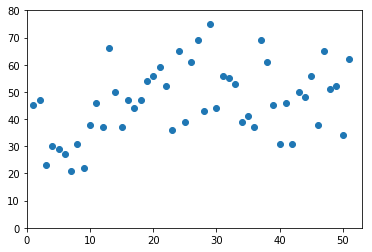

In [8]:
#Total point of both teams
import matplotlib.pyplot as plt
total_point=[(int(row[6])+int(row[10])) for row in data[1:]]
SB=list(range(1,52))
plt.scatter(SB,total_point)
plt.axis([0,53,0,80])
plt.show()


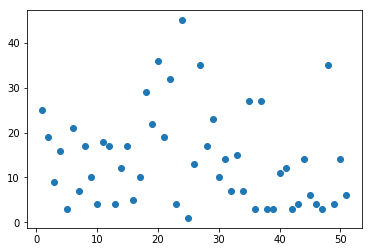

In [13]:
#The average point difference in SB
import numpy as np
diff_point=[np.abs(int(row[6])-int(row[10])) for row in data[1:]]
SB=list(range(1,52))
plt.scatter(SB,diff_point)
#plt.axis([0,53,0,20])
plt.show()

In [14]:
#The average point different in SB
np.mean(diff_point)

14.156862745098039

In [22]:
# The average point difference for the past 10 years of Super Bowls different 
# from the average point difference for the first 10 years of Super Bowls
diff_point_10_years=(np.mean(diff_point[:10]))-(np.mean(diff_point[41:]))
print(diff_point_10_years)

3.8


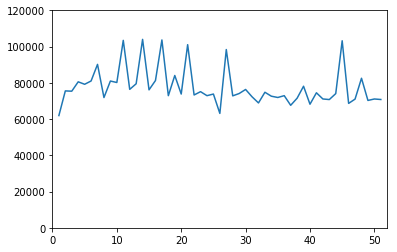

In [10]:
#attendance over time
attendance=[int(row[2]) for row in data[1:]]
plt.plot(SB,attendance)
plt.axis([0,52,0,120000])
plt.show()

In [19]:
# Total attendance 
total_attendence=np.sum(attendance)
print(total_attendence)
average_att=np.mean(attendance)
print(average_att)

3960097
77648.9607843


In [20]:
# The average attendance for the past 10 years of Super Bowls different from the average 
# attendance for the first 10 years of Super Bowls
first_10_att=np.mean(attendance[0:10])
last_10_att=np.mean(attendance[41:])
average_diff=last_10_att-first_10_att
print(average_diff)

-2337.1


In [11]:
#coach won the most SB
coach_winner_counts={}
for coach in winner_coach:
    if coach in coach_winner_counts:
        coach_winner_counts[coach]+=1
    else:
        coach_winner_counts[coach]=1
most_winner_coach=" "
max_winner_time=0
for coach,times in coach_winner_counts.items():
    if times>max_winner_time:
        most_winner_coach=coach
        max_winner_time=times
    
    
print(most_winner_coach+" won SB the most time with "+str(max_winner_time)+" times")

Bill Belichick won SB the most time with 5 times
